<a href="https://colab.research.google.com/github/Tommy840602/XGboost/blob/main/XGBoost_Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

thyroidDF = pd.read_csv('/content/thyroidDF.csv')

thyroidDF.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

thyroidDF['target'] = thyroidDF['target'].map(diagnoses)
thyroidDF.dropna(subset=['target'], inplace=True)

thyroidDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

In [2]:
thyroidDF.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


In [3]:
thyroidDF[thyroidDF.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [4]:
thyroidDF['age'] = np.where((thyroidDF.age > 100), np.nan, thyroidDF.age)

<Axes: xlabel='target', ylabel='TBG'>

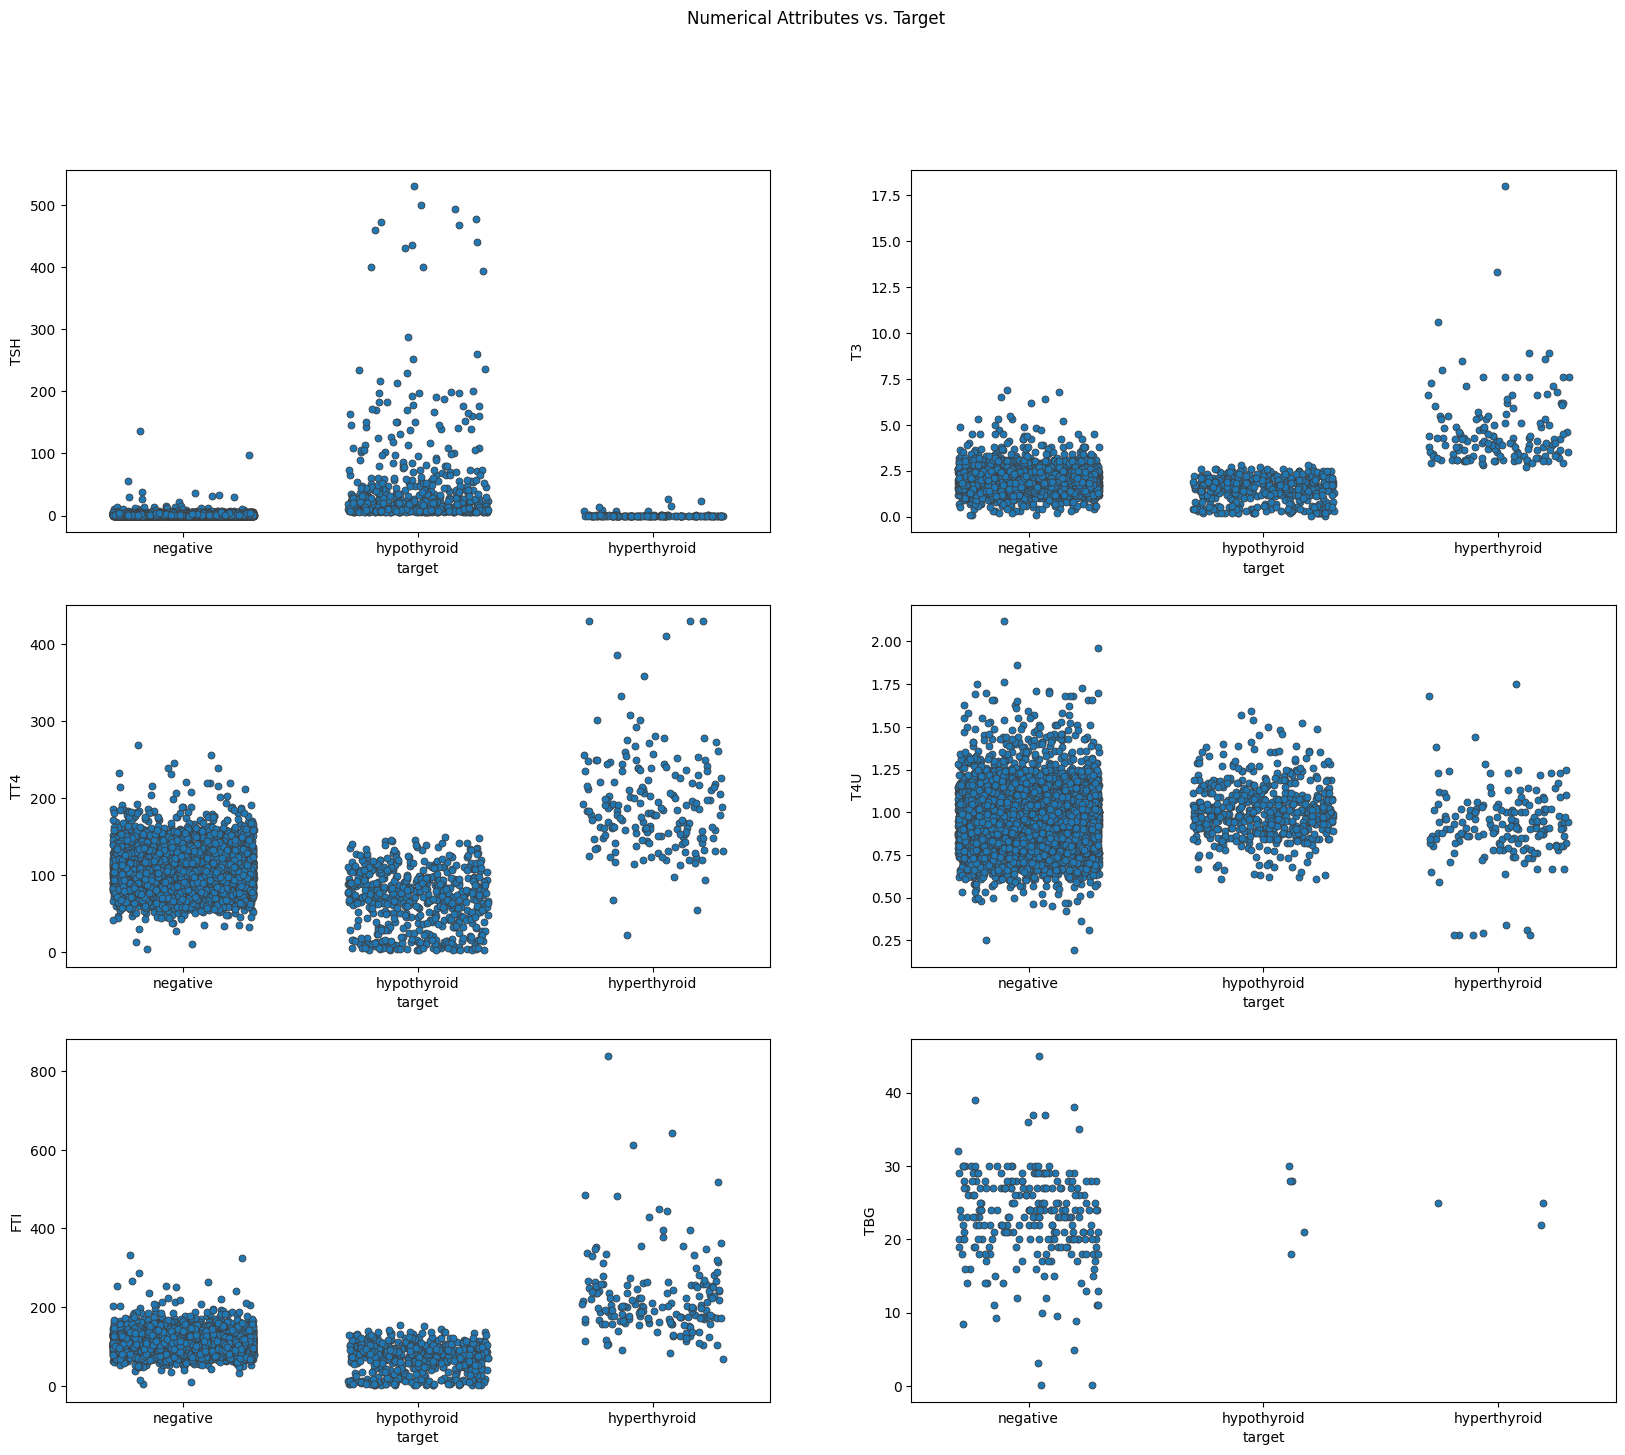

In [5]:
#EDA
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid')

# TSH vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

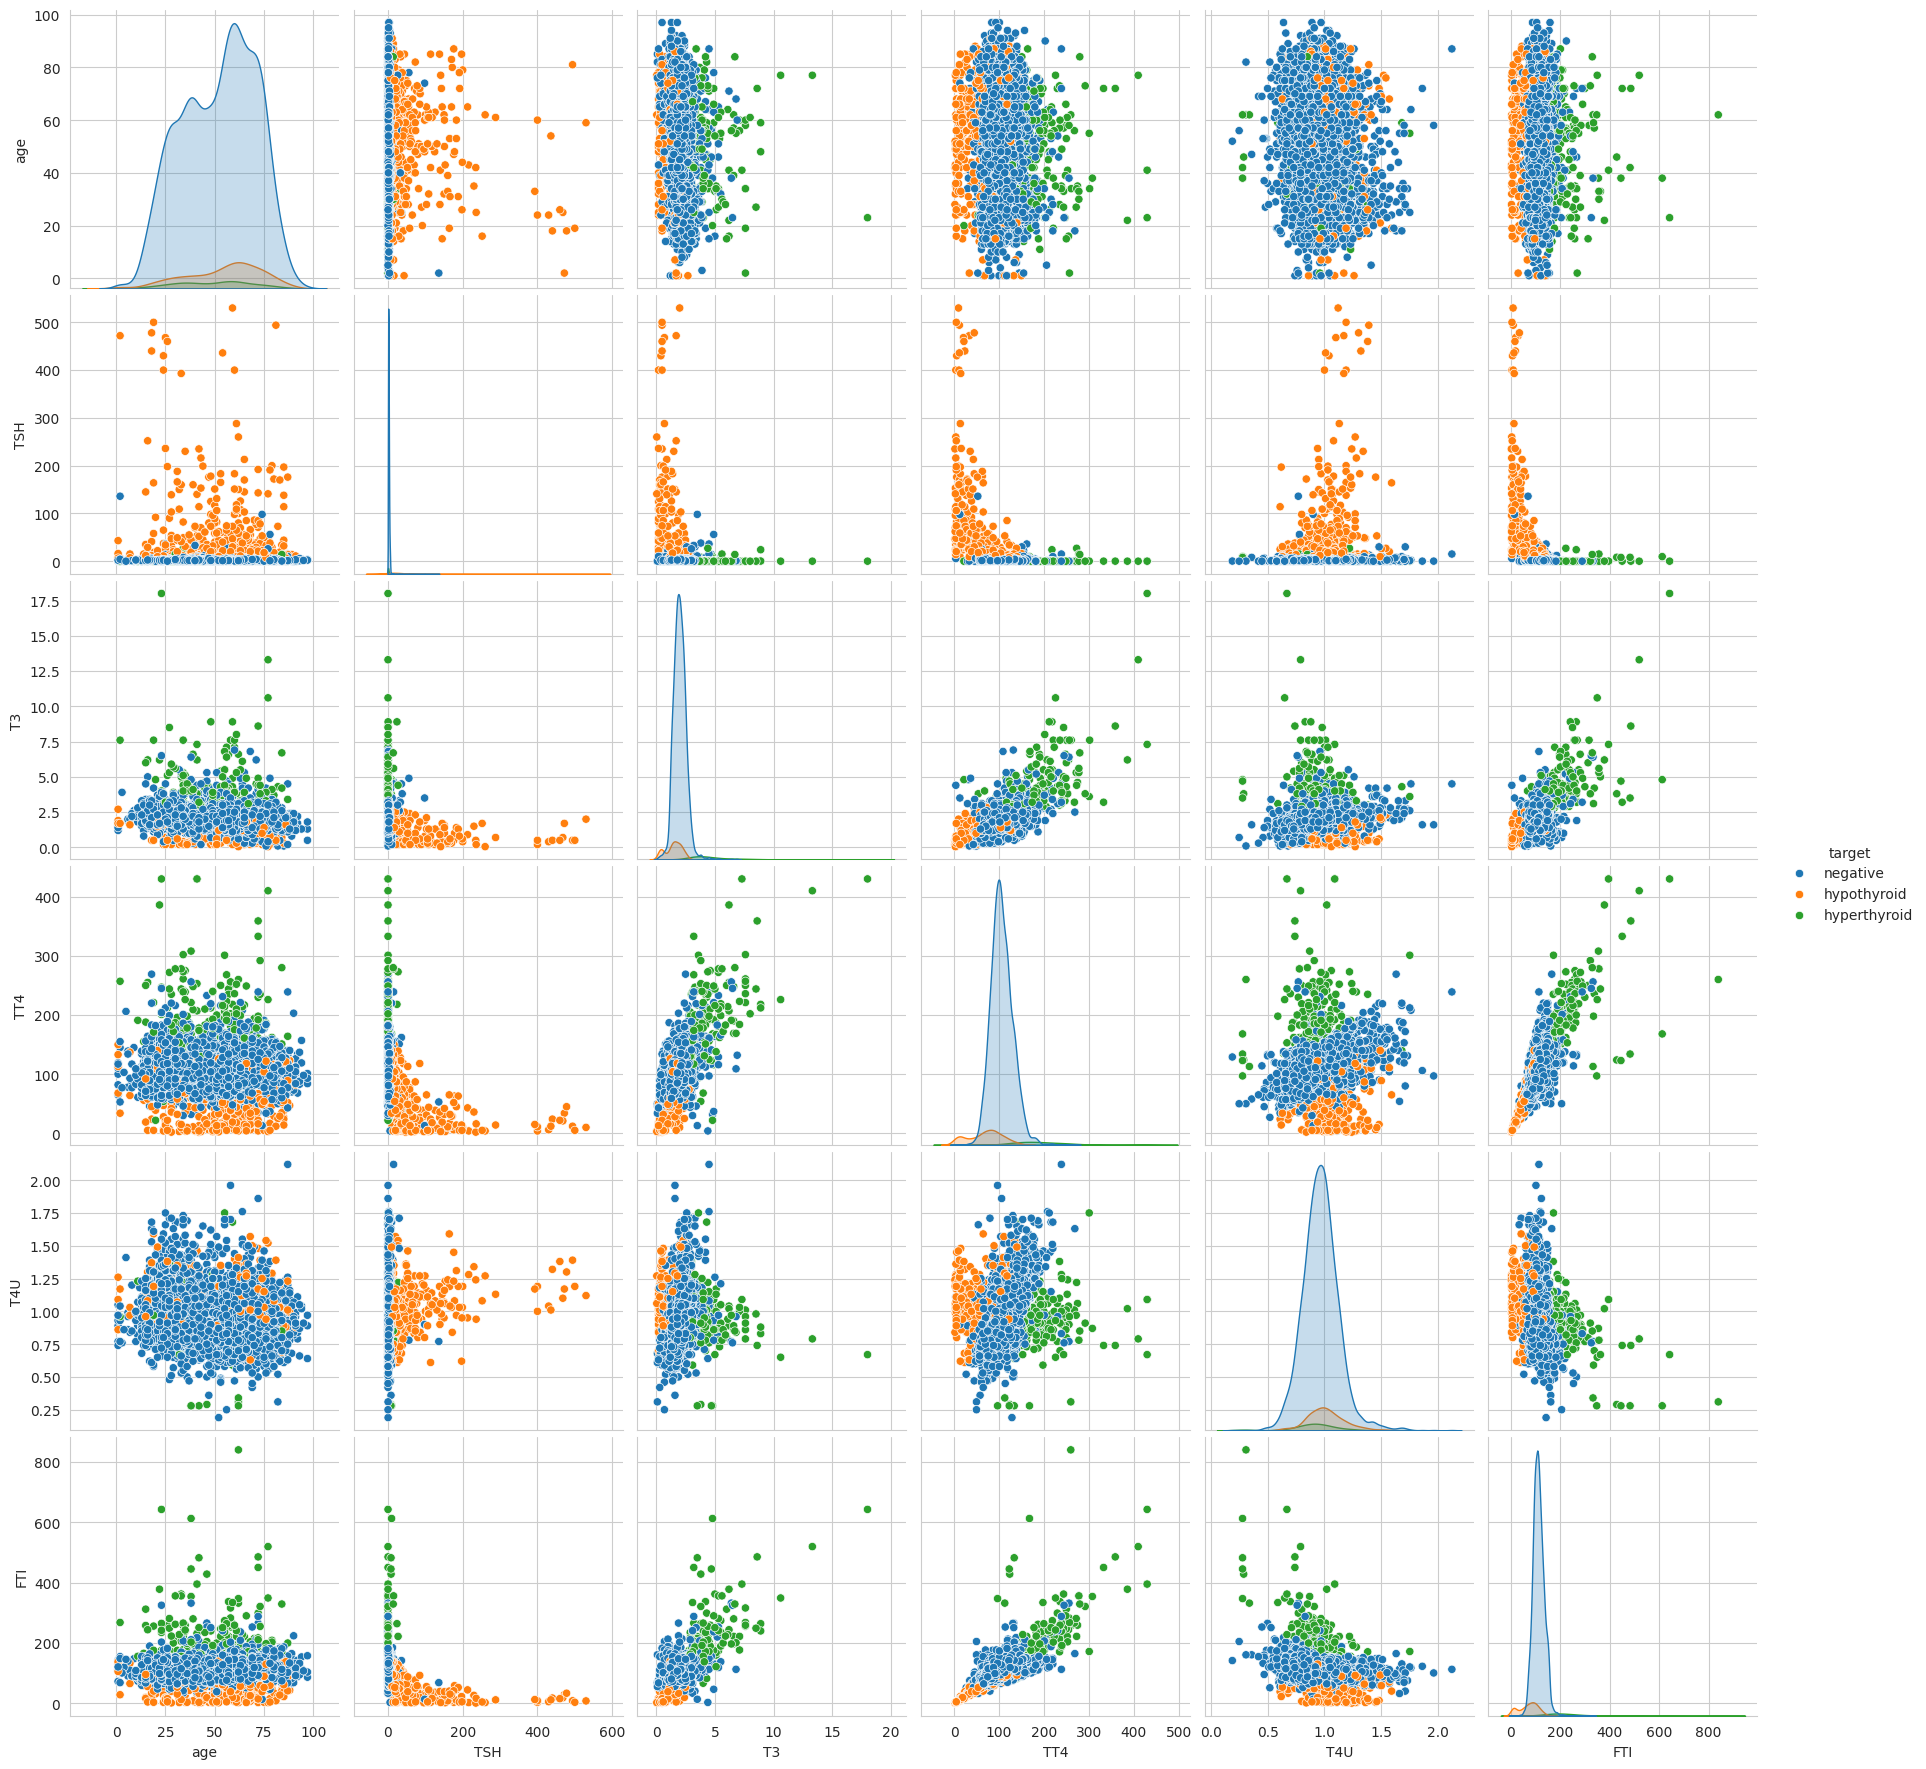

In [6]:
numericalDF = thyroidDF[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numericalDF, hue='target', height=3);
plt.show()

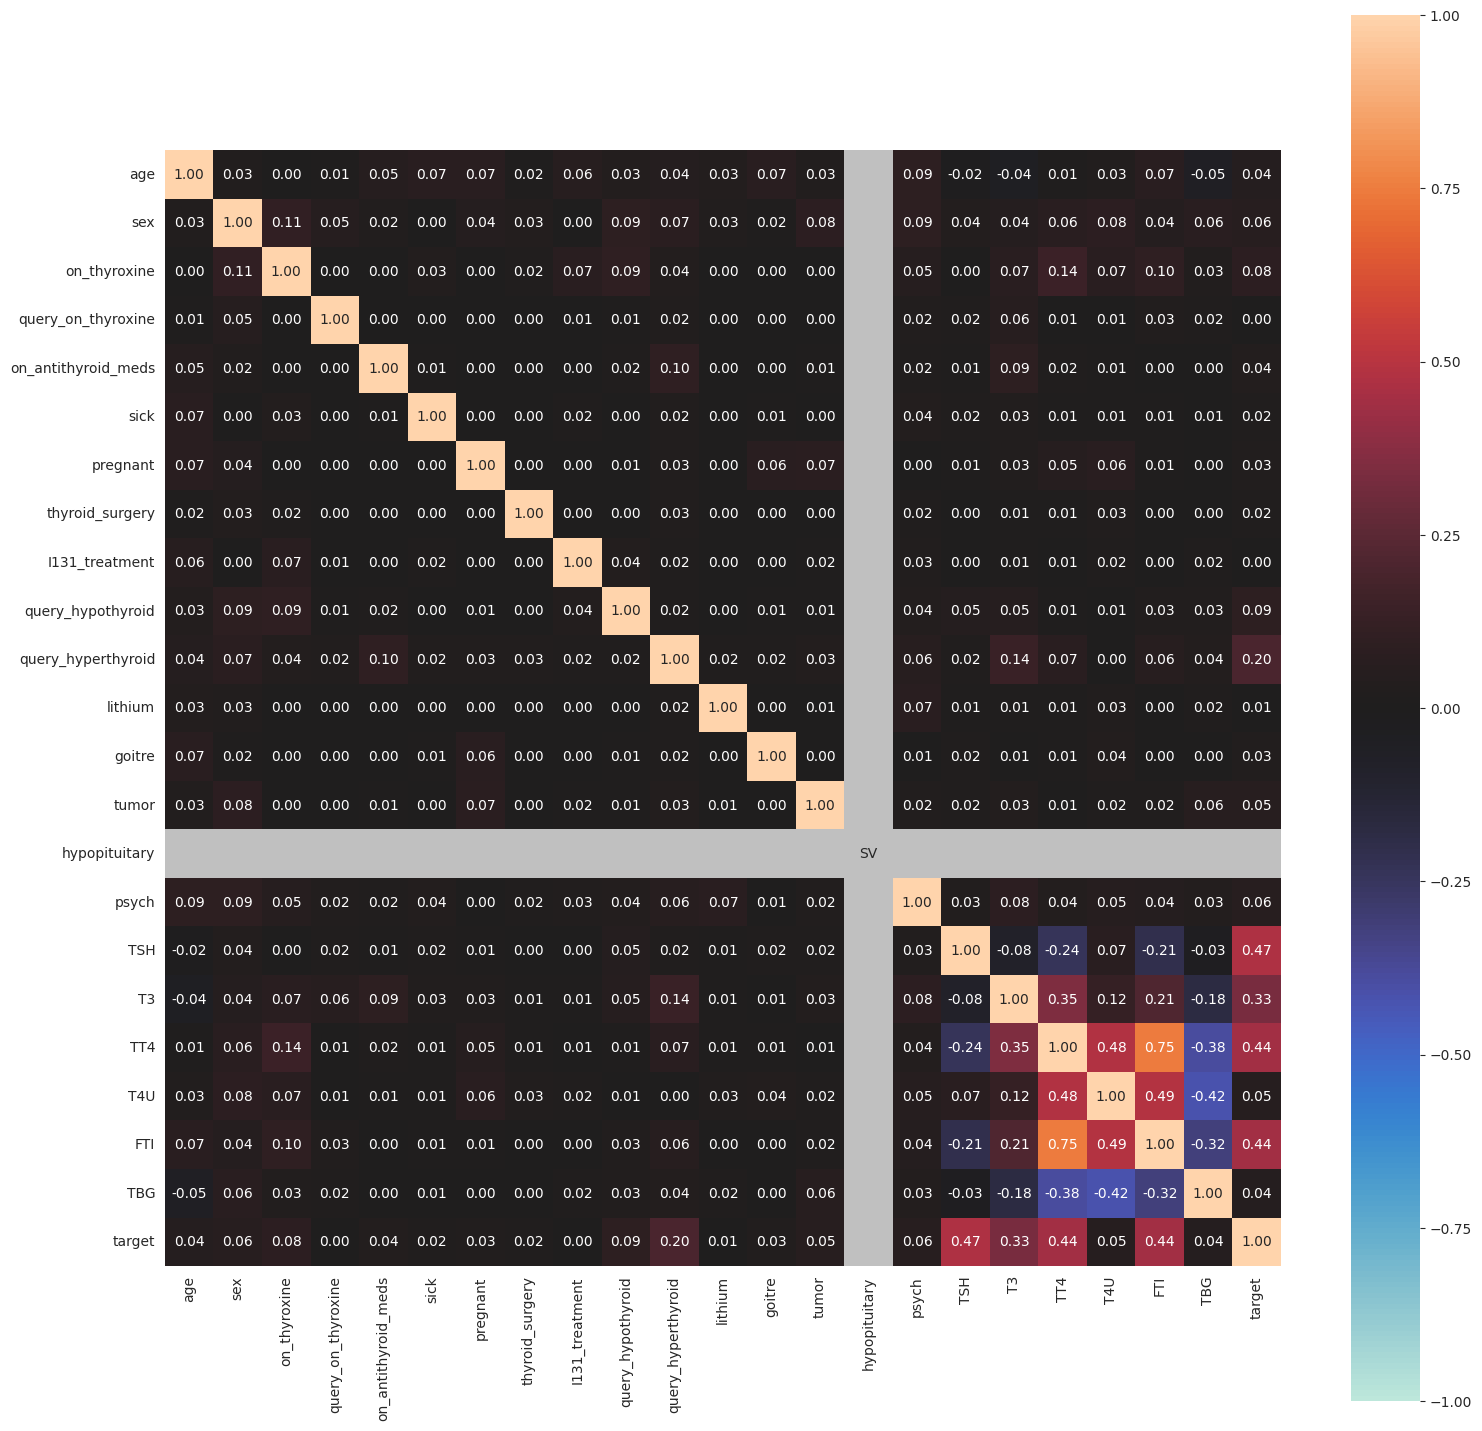

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.028867      0.003174            0.011980   
 sex                  0.028867  1.000000      0.106444            0.046954   
 on_thyroxine         0.003174  0.106444      1.000000            0.000000   
 query_on_thyroxine   0.011980  0.046954      0.000000            1.000000   
 on_antithyroid_meds  0.051107  0.024883      0.000000            0.000000   
 sick                 0.070029  0.000000      0.033454            0.000000   
 pregnant             0.069762  0.042721      0.000000            0.000000   
 thyroid_surgery      0.015461  0.032439      0.020547            0.000000   
 I131_treatment       0.059341  0.000000      0.066797            0.007647   
 query_hypothyroid    0.033580  0.088200      0.094460            0.010165   
 query_hyperthyroid   0.043243  0.073691      0.036655            0.023637   
 lithium              0.032997  0.029944      0.000000  

In [7]:
!pip install dython
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features = identify_nominal_columns(thyroidDF)

associations(thyroidDF,
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True,
            compute_only=False, clustering=False, title=None, filename=None,
            figsize=(18,18))

In [10]:
#Handling Inconsistencies
# TSH
Q1_TSH = thyroidDF['TSH'].quantile(0.25)
Q3_TSH = thyroidDF['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH - Q1_TSH
under_TSH = thyroidDF['TSH'] < (Q1_TSH - 3 * IQR_TSH)
upper_TSH = thyroidDF['TSH'] > (Q3_TSH + 3 * IQR_TSH)
print('TSH:', 'lower outliers -', sum(under_TSH), ' | upper outliers -', sum(upper_TSH))

# T3
Q1_T3 = thyroidDF['T3'].quantile(0.25)
Q3_T3 = thyroidDF['T3'].quantile(0.75)
IQR_T3 = Q3_T3 - Q1_T3
under_T3 = thyroidDF['T3'] < (Q1_T3 - 3 * IQR_T3)
upper_T3 = thyroidDF['T3'] > (Q3_T3 + 3 * IQR_T3)
print('T3:', 'lower outliers -', sum(under_T3), ' | upper outliers -', sum(upper_T3))

# TT4
Q1_TT4 = thyroidDF['TT4'].quantile(0.25)
Q3_TT4 = thyroidDF['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
under_TT4 = thyroidDF['TT4'] < (Q1_TT4 - 3 * IQR_TT4)
upper_TT4 = thyroidDF['TT4'] > (Q3_TT4 + 3 * IQR_TT4)
print('TT4:', 'lower outliers -', sum(under_TT4), ' | upper outliers -', sum(upper_TT4))

# T4U
Q1_T4U = thyroidDF['T4U'].quantile(0.25)
Q3_T4U = thyroidDF['T4U'].quantile(0.75)
IQR_T4U = Q3_T4U - Q1_T4U
under_T4U = thyroidDF['T4U'] < (Q1_T4U - 3 * IQR_T4U)
upper_T4U = thyroidDF['T4U'] > (Q3_T4U + 3 * IQR_T4U)
print('T4U:', 'lower outliers -', sum(under_T4U), ' | upper outliers -', sum(upper_T4U))

# FTI
Q1_FTI = thyroidDF['FTI'].quantile(0.25)
Q3_FTI = thyroidDF['FTI'].quantile(0.75)
IQR_FTI = Q3_FTI - Q1_FTI
under_FTI = thyroidDF['FTI'] < (Q1_FTI - 3 * IQR_FTI)
upper_FTI = thyroidDF['FTI'] > (Q3_FTI + 3 * IQR_FTI)
print('FTI:', 'lower outliers -', sum(under_FTI), ' | upper outliers -', sum(upper_FTI))

TSH: lower outliers - 0  | upper outliers - 456
T3: lower outliers - 0  | upper outliers - 84
TT4: lower outliers - 0  | upper outliers - 55
T4U: lower outliers - 7  | upper outliers - 22
FTI: lower outliers - 0  | upper outliers - 83


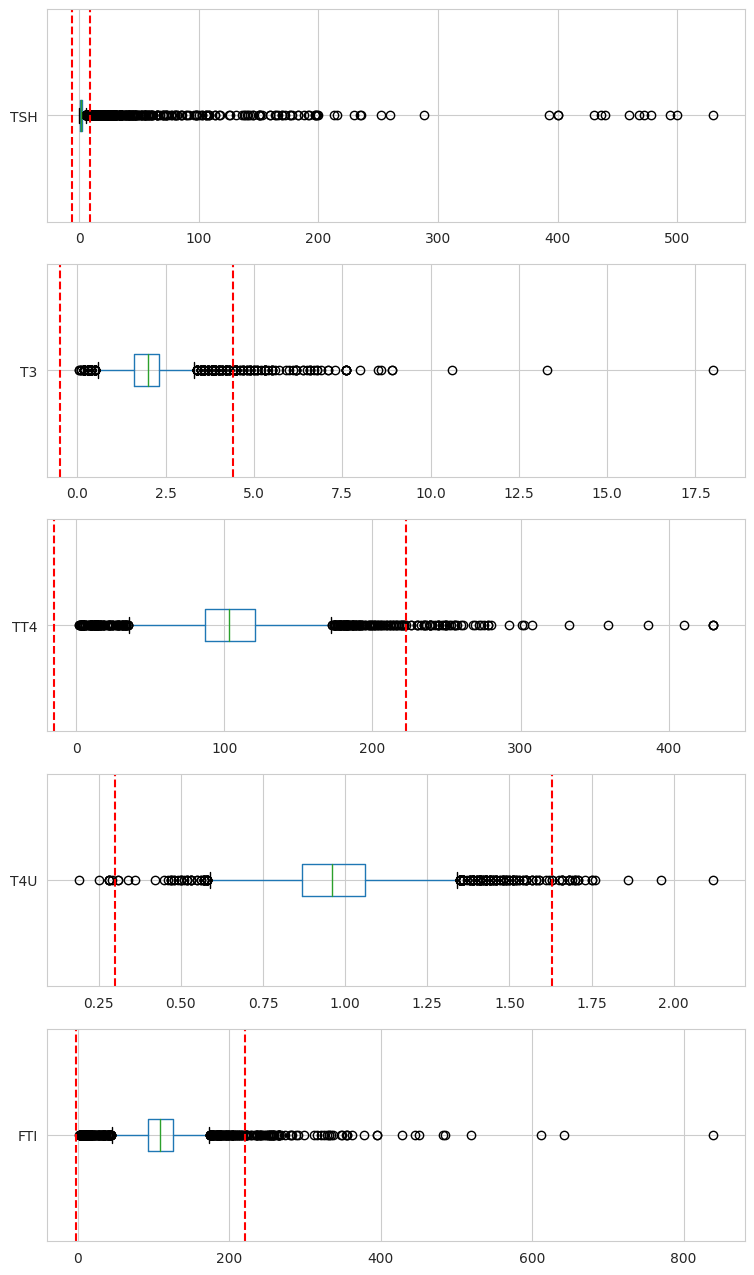

In [11]:
fig, axs= plt.subplots(nrows = 5, figsize=(9,16))

# TSH
thyroidDF.boxplot(column='TSH', ax=axs[0], vert = False)
axs[0].axvline(x=(Q1_TSH - 3*IQR_TSH), color='r', linestyle='--')
axs[0].axvline(x=(Q3_TSH + 3*IQR_TSH), color='r', linestyle='--')
# T3
thyroidDF.boxplot(column='T3', ax=axs[1], vert = False)
axs[1].axvline(x=(Q1_T3 - 3*IQR_T3), color='r', linestyle='--')
axs[1].axvline(x=(Q3_T3 + 3*IQR_T3), color='r', linestyle='--')
# TT4
thyroidDF.boxplot(column='TT4', ax=axs[2], vert = False)
axs[2].axvline(x=(Q1_TT4 - 3*IQR_TT4), color='r', linestyle='--')
axs[2].axvline(x=(Q3_TT4 + 3*IQR_TT4), color='r', linestyle='--')
# T4U
thyroidDF.boxplot(column='T4U', ax=axs[3], vert = False)
axs[3].axvline(x=(Q1_T4U - 3*IQR_T4U), color='r', linestyle='--')
axs[3].axvline(x=(Q3_T4U + 3*IQR_T4U), color='r', linestyle='--')
# FTI
thyroidDF.boxplot(column='FTI', ax=axs[4], vert = False)
axs[4].axvline(x=(Q1_FTI - 3*IQR_FTI), color='r', linestyle='--')
axs[4].axvline(x=(Q3_FTI + 3*IQR_FTI), color='r', linestyle='--')

In [12]:
#Investigating Missing Values
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 7.54%


,Total,Percent
TBG,7287,0.965677
T3,2209,0.292738
TSH,722,0.095680
T4U,676,0.089584
FTI,669,0.088656
TT4,354,0.046912
sex,250,0.033130
age,4,0.000530
goitre,0,0.000000
psych,0,0.000000


In [13]:
#Missing Table Summary
thyroidDF.drop(['TBG'], axis=1, inplace=True)
thyroidDF.dropna(subset=['age'], inplace=True)
thyroidDF['sex'] = np.where((thyroidDF.sex.isnull()) & (thyroidDF.pregnant == 't'), 'F', thyroidDF.sex)

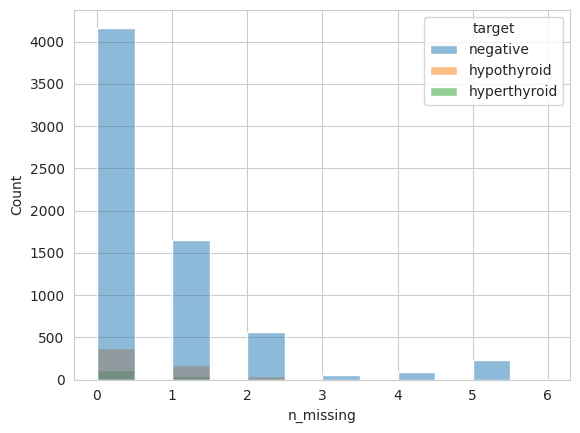

In [14]:
thyroidDF['n_missing'] = thyroidDF.isnull().sum(axis=1)
sns.histplot(thyroidDF, x='n_missing', binwidth=0.5, hue='target');

In [15]:
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

thyroidDF.drop(thyroidDF.index[thyroidDF['n_missing'] > 2], inplace=True)
missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 2.89%


,Total,Percent
T3,1910,0.267432
TSH,406,0.056847
T4U,290,0.040605
FTI,283,0.039625
sex,208,0.029123
TT4,6,0.000840
age,0,0.000000
goitre,0,0.000000
target,0,0.000000
psych,0,0.000000


In [19]:
#XGBoost Classifier

#Preprocessing for XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

thyroidDF.replace('f', 0, inplace=True)
thyroidDF.replace('t', 1, inplace=True)

thyroidDF.replace('M', 0, inplace=True)
thyroidDF.replace('F', 1, inplace=True)

xgbDF = thyroidDF.replace(np.nan, 0)

diagnoses = {'negative': 0,
             'hypothyroid': 1,
             'hyperthyroid': 2}

xgbDF['target'] = xgbDF['target'].map(diagnoses)

X = xgbDF.drop('target', axis=1).copy()
y = xgbDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

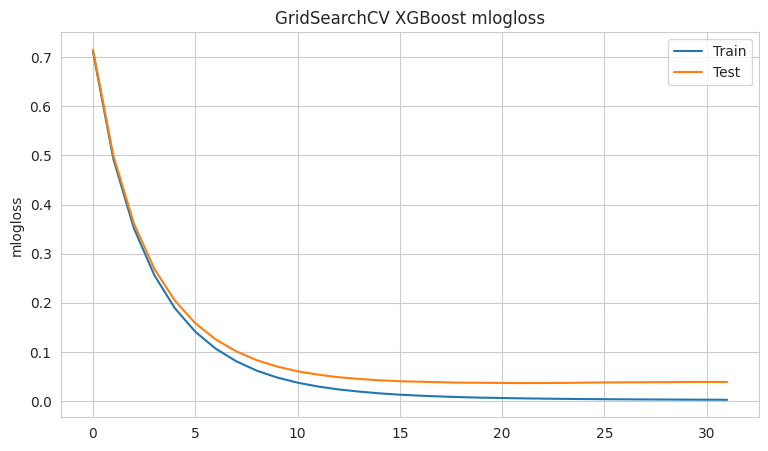

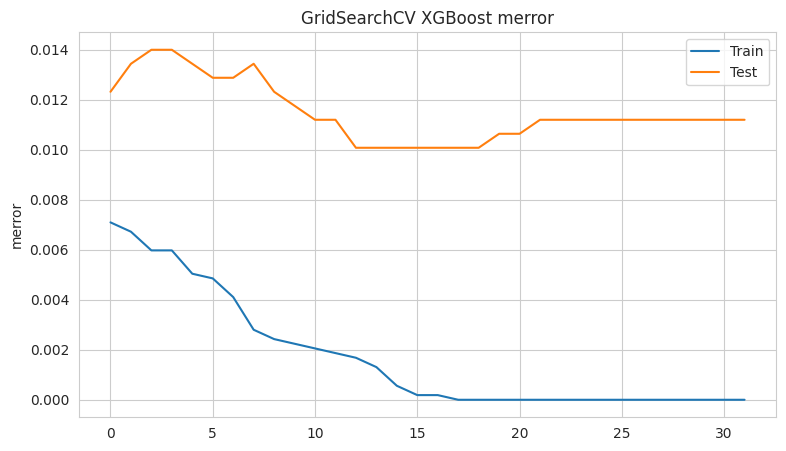


------------------ Confusion Matrix -----------------

[[1587    6    4]
 [   1  144    0]
 [   9    0   35]]

-------------------- Key Metrics --------------------

Accuracy: 0.99
Balanced Accuracy: 0.93

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.95
Macro Recall: 0.93
Macro F1-score: 0.94

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.96      0.99      0.98       145
           2       0.90      0.80      0.84        44

    accuracy                           0.99      1786
   macro avg       0.95      0.93      0.94      1786
weighted avg       0.99      0.99      0.99      1786

---------------------- XGBoost ----------------------


In [20]:
#XGBoost model v1

xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=3,
                            missing=1,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train,
            y_train,
            verbose=0,
            eval_set=[(X_train, y_train), (X_test, y_test)])

results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------')

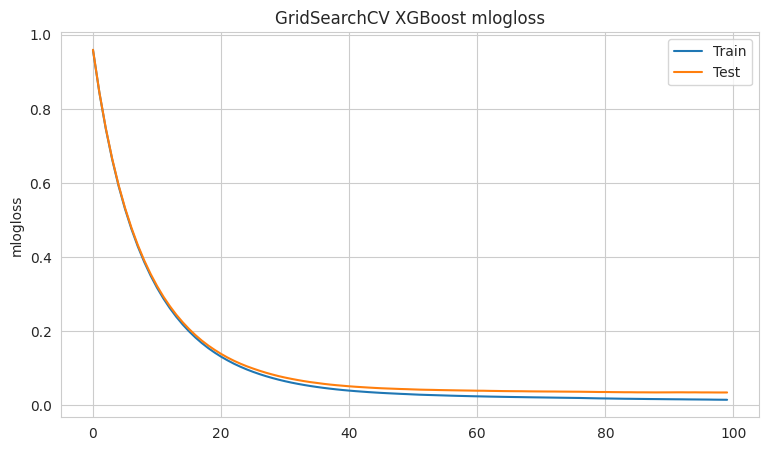

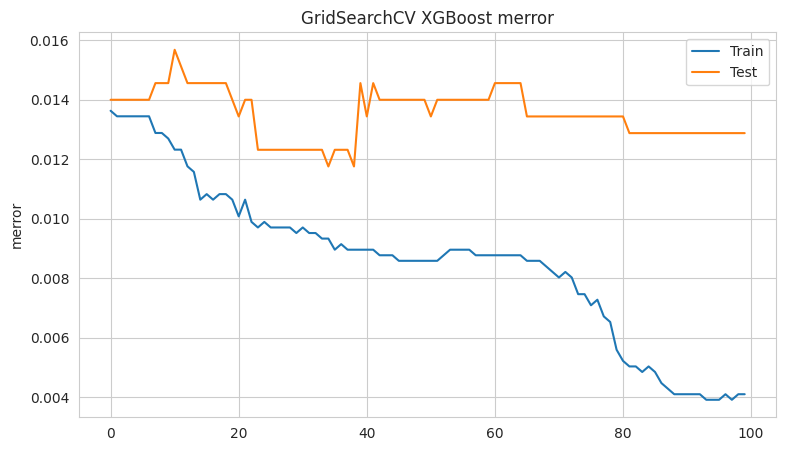


------------------ Confusion Matrix -----------------

[[1587    5    5]
 [   2  143    0]
 [  11    0   33]]

Accuracy: 0.99
Balanced Accuracy: 0.91

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.94
Macro Recall: 0.91
Macro F1-score: 0.92

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.97      0.99      0.98       145
           2       0.87      0.75      0.80        44

    accuracy                           0.99      1786
   macro avg       0.94      0.91      0.92      1786
weighted avg       0.99      0.99      0.99      1786

---------------------- XGBoost ----------------------


In [21]:
#XGBoost model v2

xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=3,
                            missing=1,
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1,
                            subsample=1,
                            colsample_bytree=1,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train,
      y_train,verbose=0,
      eval_set=[(X_train, y_train), (X_test, y_test)])

results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------')

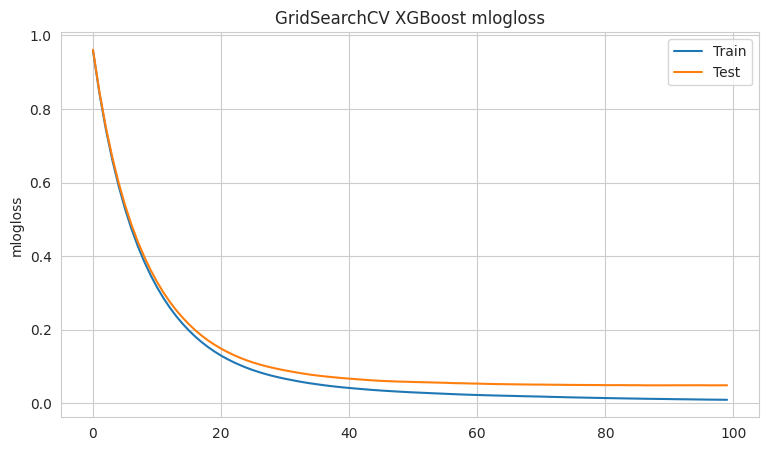

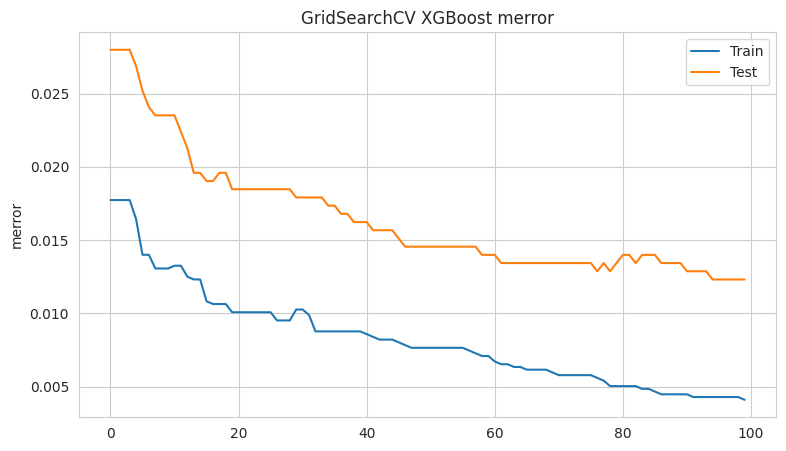


------------------ Confusion Matrix -----------------

[[1576    7   14]
 [   0  145    0]
 [   3    0   41]]

Accuracy: 0.99
Balanced Accuracy: 0.97

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.90
Macro Recall: 0.97
Macro F1-score: 0.93

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1597
           1       0.95      1.00      0.98       145
           2       0.75      0.93      0.83        44

    accuracy                           0.99      1786
   macro avg       0.90      0.97      0.93      1786
weighted avg       0.99      0.99      0.99      1786

---------------------- XGBoost ----------------------


In [22]:
#XGBoost Model v3
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train)

xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=3,
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            #subsample=0.8, # tried but not ideal
                            #colsample_bytree=0.3, # tried but not ideal
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)

xgb_clf.fit(X_train,
      y_train,
      verbose=0,
      sample_weight=sample_weights,
      eval_set=[(X_train, y_train), (X_test, y_test)])

results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------')

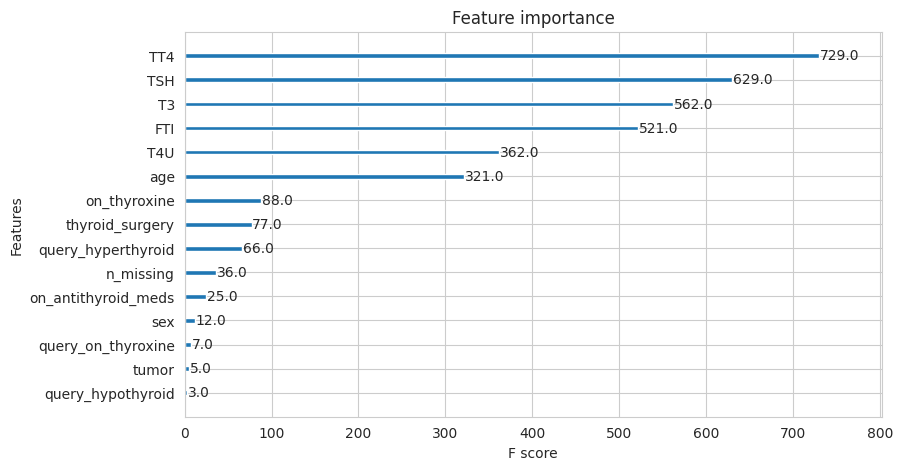

In [23]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf, ax=ax)
plt.show()

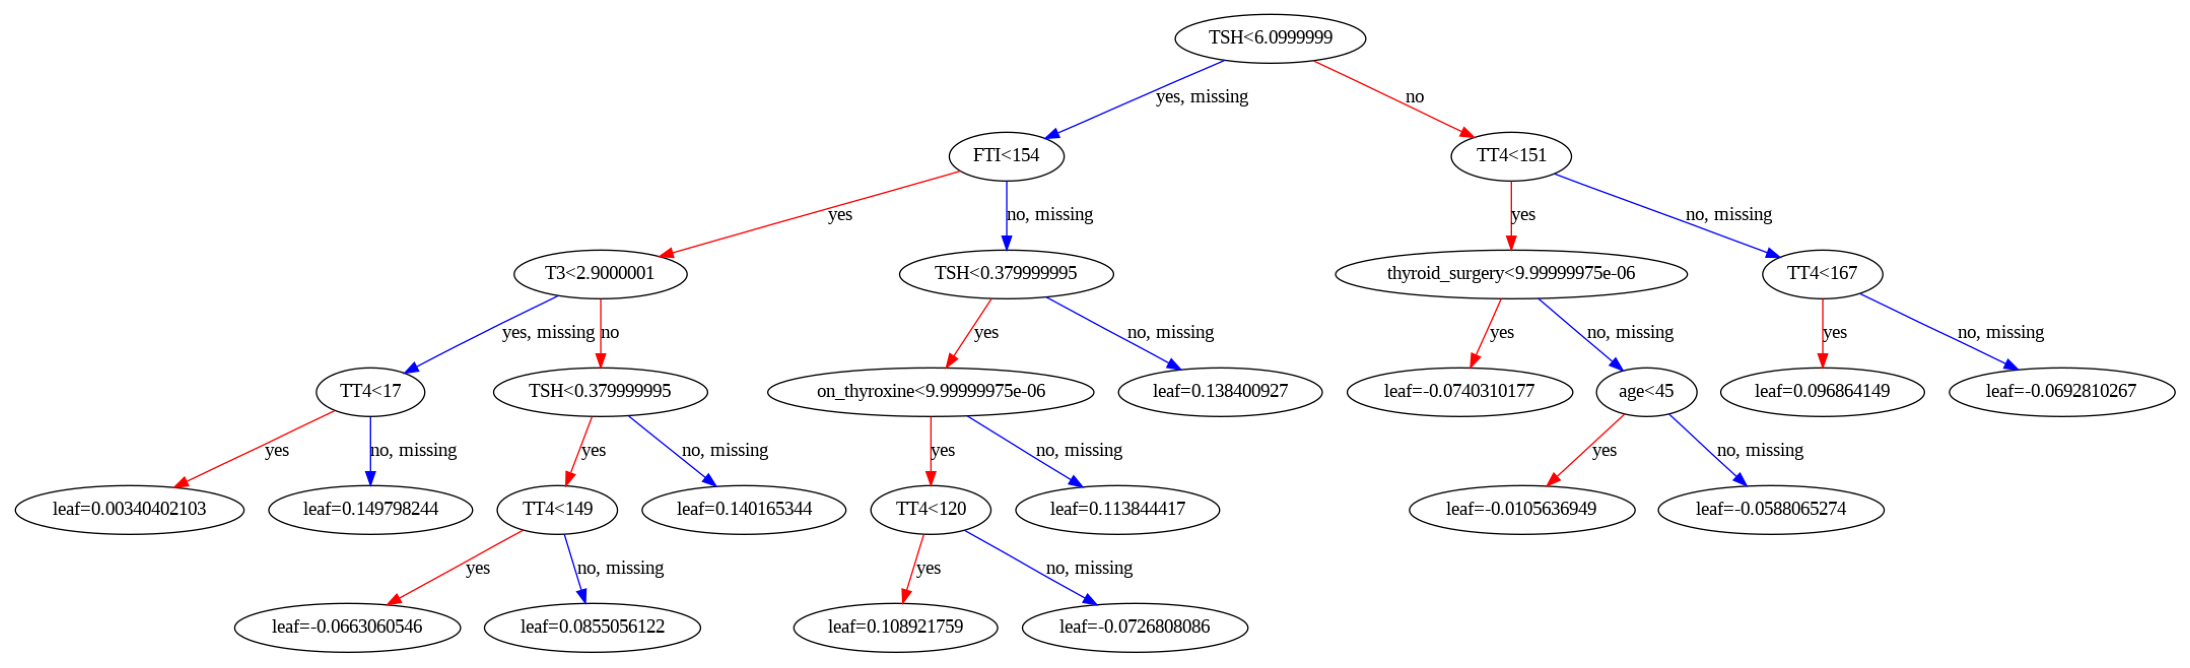

In [25]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 28,12
xgb.plot_tree(xgb_clf)
plt.show()